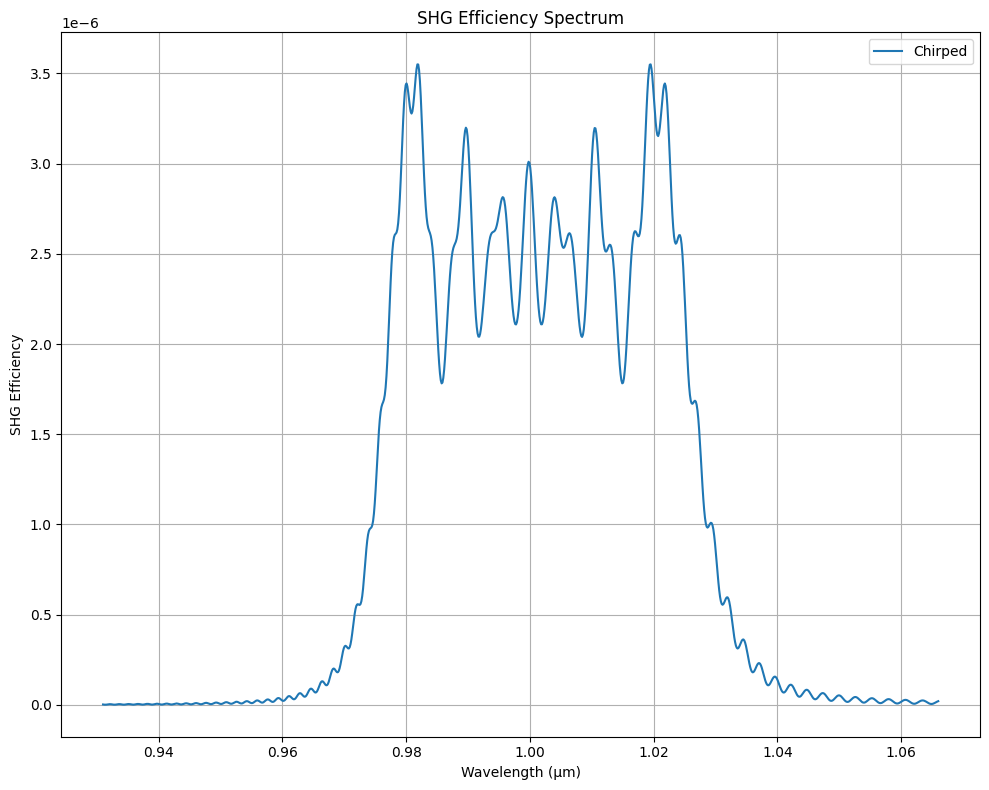

In [1]:
from syuron import shg2
import jax.numpy as jnp
import matplotlib.pyplot as plt


# チャープドドメイン幅生成
def create_widths(L, Lambda0, chirp=0.0):
    widths, z = [], 0.0
    while z < L:
        current = Lambda0 / (1 + chirp * z)
        widths.append(current / 2)
        z += current
    return widths


# 均一なドメイン幅
domain_widths = create_widths(2000, 7.2, 0.0001)
pp1 = [3.6] * round(sum(domain_widths)/3.6)
pp2 = [3.4] * round(sum(domain_widths)/3.4)


wavelength_range = jnp.linspace(0.931, 1.066, 1000).tolist()

params = shg2.SpectrumParams(
    domain_widths_dim=[pp1, pp2, domain_widths],
    kappa_magnitude_dim=[1.31E-5],
    T_dim=[70],
    wavelength_dim=wavelength_range,
    fund_power_dim=[1],
    sh_power_dim=[0]
)

eff_tensor = shg2.analyzeSpectrum(params)

plt.figure(figsize=(10, 8))
labels = ["Uniform 3.6", "Uniform 3.4", "Chirped"]
# for i, label in enumerate(labels):
#     eff_line = eff_tensor[i, 0, 0, :, 0, 0]
#     plt.plot(wavelengths, eff_line, label=label)
eff_line = eff_tensor[2, 0, 0, :, 0, 0]
plt.plot(wavelength_range, eff_line, label="Chirped")
plt.xlabel("Wavelength (μm)")
plt.ylabel("SHG Efficiency")
plt.title("SHG Efficiency Spectrum")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()